In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [233]:
#read new combined cleaned dataset
df = pd.read_csv("..\Project 1\WSB Data\WSB.csv", index_col=0)

In [133]:
#sort by num_mentions rolled up into ticker
df_num_mentions =df.sort_values(["num_mentions","ticker"],ascending=False).groupby("ticker")
df_num_mentions = df.groupby('ticker')['num_mentions'].sum().sort_values(ascending=False)
df_num_mentions.head(20)

ticker
GME     122643
BB       41669
AMC      38061
PLTR     20785
CLOV     15889
WISH     10965
SPY      10823
RKT      10520
TSLA     10194
CLNE      8252
NOK       8133
UWMC      6239
AMD       5620
TLRY      5362
SNDL      5133
AAPL      5040
WKHS      4565
MVIS      4465
NIO       4198
ALL       4063
Name: num_mentions, dtype: int64

In [204]:
df_num_mentions.value_counts()

1       838
2       488
3       294
4       175
5       146
       ... 
1741      1
1233      1
1359      1
3568      1
1835      1
Name: num_mentions, Length: 362, dtype: int64

Text(0.5, 1.0, 'Predicted Positive & Negative context')

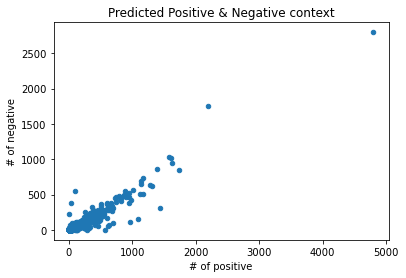

In [213]:
df_test = df[['pos_count','neg_count']]
df_test.plot.scatter(x = 'pos_count', y = 'neg_count')
plt.xlabel('# of positive')
plt.ylabel('# of negative')
plt.title("Predicted Positive & Negative context")

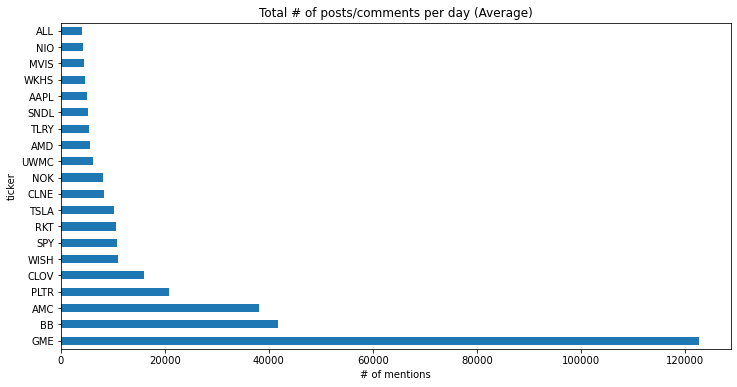

In [215]:
# making a chart off of num_mentions (above)
plt.figure(figsize = (12,6))
plt.title("Total # of posts/comments per day (Average)")
plt.xlabel('# of mentions')
df_num_mentions.head(20).plot(kind = 'barh')

* want to create a graph off this similar to reinforce that the % of mentions in any given day is still skewed to the same names
* second chart to reinforce why we chose GME AMC and BB
* can show NAPA as an outlier because of only 3 data points in this

In [138]:
#sort by pct_mentions rolled up into ticker
df_pct_mentions = df.sort_values(["pct_mentions","ticker"],ascending=False).groupby("ticker")
#convert into df
df_pct_mentions = df.groupby('ticker')[['pct_mentions']].mean().sort_values(by='pct_mentions',ascending=False)
# * 100 to % col to reflect percentages
df_pct_mentions['pct_mentions'] = 100 * df_pct_mentions['pct_mentions'] 

Text(0, 0.5, '% of all mentions in a day')

<Figure size 864x432 with 0 Axes>

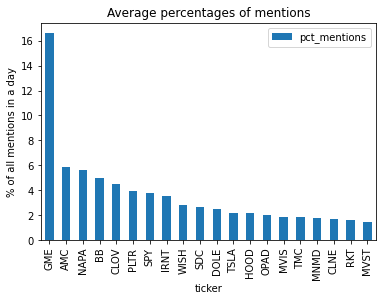

In [203]:
# making a chart off of num_mentions (above)

plt.figure(figsize=(12,6)) 
df_pct_mentions.head(20).plot(kind='bar')
plt.title('Average percentages of mentions')
plt.ylabel('% of all mentions in a day')

In [125]:
df_pct_mentions.head()

,pct_mentions
ticker,
GME,16.591133
AMC,5.882051
NAPA,5.666667
BB,4.985222
CLOV,4.517857


In [126]:
#what is NAPA, seems like an outlier with few data points
df[df.index == 'NAPA']

,date,url,num_mentions,pct_mentions,pos_count,neg_count,bullish_pct,bearish_pct,neutral_pct,price,price_change_net,price_change_pct,time_of_price
ticker,,,,,,,,,,,,,
NAPA,2021-03-23,https://finance.yahoo.com/quote/NAPA?p=NAPA,10,0.005,7,0,0.7,0.0,0.3,19.40,0.40,0.0211,At close: 4:00PM EDT
NAPA,2021-04-07,https://finance.yahoo.com/quote/NAPA?p=NAPA,1,0.005,1,0,1.0,0.0,0.0,17.54,0.02,0.0011,At close: 4:00PM EDT
NAPA,2021-07-16,https://finance.yahoo.com/quote/NAPA?p=NAPA,288,0.160,288,0,1.0,0.0,0.0,20.69,-0.68,-0.0316,As of 1:12PM EDT. Market open.


Explore the # of times a stock was mentioned in a predicted positive context for all the days rolled up
- also do the same for the negative context for all the days rolled up


In [296]:
#sort by pos_count rolled up into ticker
df_pos_count =df.sort_values(["pos_count","ticker"],ascending=False).groupby("ticker")
df_pos_count = df.groupby('ticker')['pos_count'].sum().sort_values(ascending=False)
df_pos_count.head(5)

ticker
GME     57609
BB      17018
AMC     16999
PLTR     8497
WISH     7928
Name: pos_count, dtype: int64

In [297]:
#sort by neg_count rolled up into ticker
df_neg_count =df.sort_values(["neg_count","ticker"],ascending=False).groupby("ticker")
df_neg_count = df.groupby('ticker')['neg_count'].sum().sort_values(ascending=False)
df_neg_count.head(5)

#df_neg_count.to_csv('test.csv')

ticker
GME     32026
AMC      8611
BB       7202
PLTR     4758
SPY      3128
Name: neg_count, dtype: int64

Seems like the same top 3 names come up.  What is the ratio of positive context vs all pos/neg context?

In [298]:
#create new dataframe to get calculation ready
df_total_count = pd.DataFrame(zip(df.index, df.pos_count, df.neg_count))
df_total_count.rename(columns={0:'ticker', 1:'pos_count', 2:'neg_count'}, inplace=True)
df_total_count.set_index('ticker', inplace=True)

#create the sum of the pos_count and neg_count
sum_col = df_total_count['pos_count'] + df_total_count['neg_count']
df_total_count['total_count'] = sum_col
df_total_count

#create the ratio of the pos_count over total_count
ratio_col = (df_total_count['pos_count'] / df_total_count['total_count']) * 100
df_total_count['ratio'] = ratio_col

#sort and average the daily ratio
df_total_count1 = df_total_count.sort_values(["total_count","ticker"],ascending=False).groupby("ticker")
df_total_count1 = df_total_count.groupby('ticker')[['total_count','ratio']].mean().sort_values(by='total_count',ascending=False)
df_total_count1.head(3)

,total_count,ratio
ticker,,
GME,441.551724,64.433524
AMC,131.333333,63.050788
BB,119.310345,69.422430


The code below is for individual stock volume analysis
- Will need to find Average Volume for the period of each stock
- Can compare this to SPY
- then perhaps compare it to a year ago or break it monthly to see spikes compared to the overall period volume

In [73]:
df1 = pd.read_csv("GME.csv", index_col=0)
df1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-04,175.949997,176.949997,170.770004,171.360001,171.360001,1195700
2021-10-05,171.190002,173.169998,166.699997,172.179993,172.179993,1315900
2021-10-06,170.059998,172.960007,165.809998,171.070007,171.070007,1200300
2021-10-07,172.000000,175.199997,170.539993,172.119995,172.119995,1159300
2021-10-08,172.500000,175.720001,171.119995,172.679993,172.679993,817000


In [74]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-28,21.309999,21.969999,20.350000,20.990000,20.990000,8965900
2020-12-29,20.820000,21.070000,18.559999,19.379999,19.379999,9241400
2020-12-30,19.379999,20.000000,18.850000,19.260000,19.260000,5934400
2020-12-31,19.250000,19.799999,18.799999,18.840000,18.840000,6922700
2021-01-04,19.000000,19.100000,17.150000,17.250000,17.250000,10022500


In [113]:
def volume_return(stock):
    
    #read the csv file and returns rate of return in percentage
    df = pd.read_csv(stock)
    #return = (current px - initial px) / initial px * 100b
    return ((df.iloc[-1]['Volume'] - df.iloc[0]['Volume']) / df.iloc[0]['Volume']) * 100

In [76]:
volume_return("SPY.csv")

91.00547686690393

In [77]:
volume_return("GME.csv")

-90.88769671756322

In [78]:
volume_return("AMC.csv")

23.20623822710054

In [79]:
volume_return("BB.csv")

-52.21229926375494

The code below is individual stock rate of return and stock price charts
- GME, AMC, BBY were taken as the most mentioned stocks
- Also added SPY as an indicator of the overall market (SPY is an ETF that is widely used to track the S&P index)

In [112]:
def stock_return(stock):
    
    #read the csv file and returns rate of return in percentage
    df = pd.read_csv(stock)
    #return = (current px - initial px) / initial px * 100
    return ((df.iloc[-1]['Close'] - df.iloc[0]['Close']) / df.iloc[0]['Close']) * 100

In [81]:
stock_return("SPY.csv")

17.65052790537426

In [82]:
stock_return("GME.csv")

722.6774321105288

In [83]:
stock_return("AMC.csv")

1456.0669037656903

In [84]:
stock_return("BB.csv")

36.482558139534895

In [107]:
# created function to produce simple stock charts
def stock_chart(csv):
    
    #read file and convert into datetime
    df_temp = pd.read_csv(csv, parse_dates=['Date'])

    return df_temp.set_index("Date")["Close"].plot()

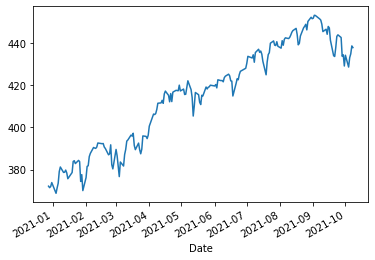

In [108]:
stock_chart('SPY.csv')

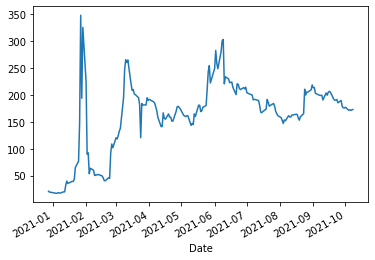

In [109]:
stock_chart('GME.csv')

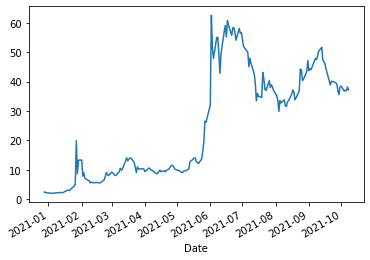

In [110]:
stock_chart('AMC.csv')

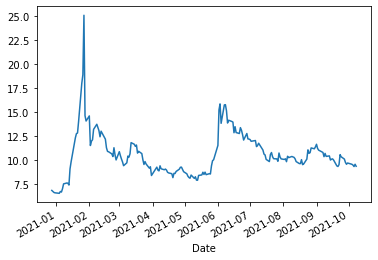

In [111]:
stock_chart('BB.csv')